In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
current_dir = "/gdrive/My Drive/phishing/"

In [0]:
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


In [4]:


df = pd.read_csv(current_dir + "data.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [0]:
df.columns 

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [0]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]



In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25, random_state=1)

## Number of Label class.

In [7]:
y.unique()

array([1, 0])

# Decision Tree Classifier

In [0]:
decision_tree_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

decision_tree_clf.fit(X_train , y_train )



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Prediction score on Validation data -- 0.9409

In [0]:
decision_tree_clf.score(X_val , y_val)

0.9409368635437881

In [0]:
index = 6

print("Input Params" , X_test.iloc[index] ) 
print( "Actual output" ,  y_test.iloc[index] )

Input Params having_IP_Address              0
URL_Length                    -1
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                 -1
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        1
port                           1
HTTPS_token                    0
Request_URL                   -1
URL_of_Anchor                 -1
Links_in_tags                 -1
SFH                           -1
Submitting_to_email            1
Abnormal_URL                   0
Redirect                       0
on_mouseover                   1
RightClick                     1
popUpWidnow                    1
Iframe                         1
age_of_domain                  1
DNSRecord                      1
web_traffic                    1
Page_Rank                     -1
Google_Index                   0
Links_pointing_to_page         1
Statistical_report            

In [0]:
decision_tree_clf.predict([X_test.iloc[6]])

array([1])

In [0]:
decision_tree_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>

## Model Visualization

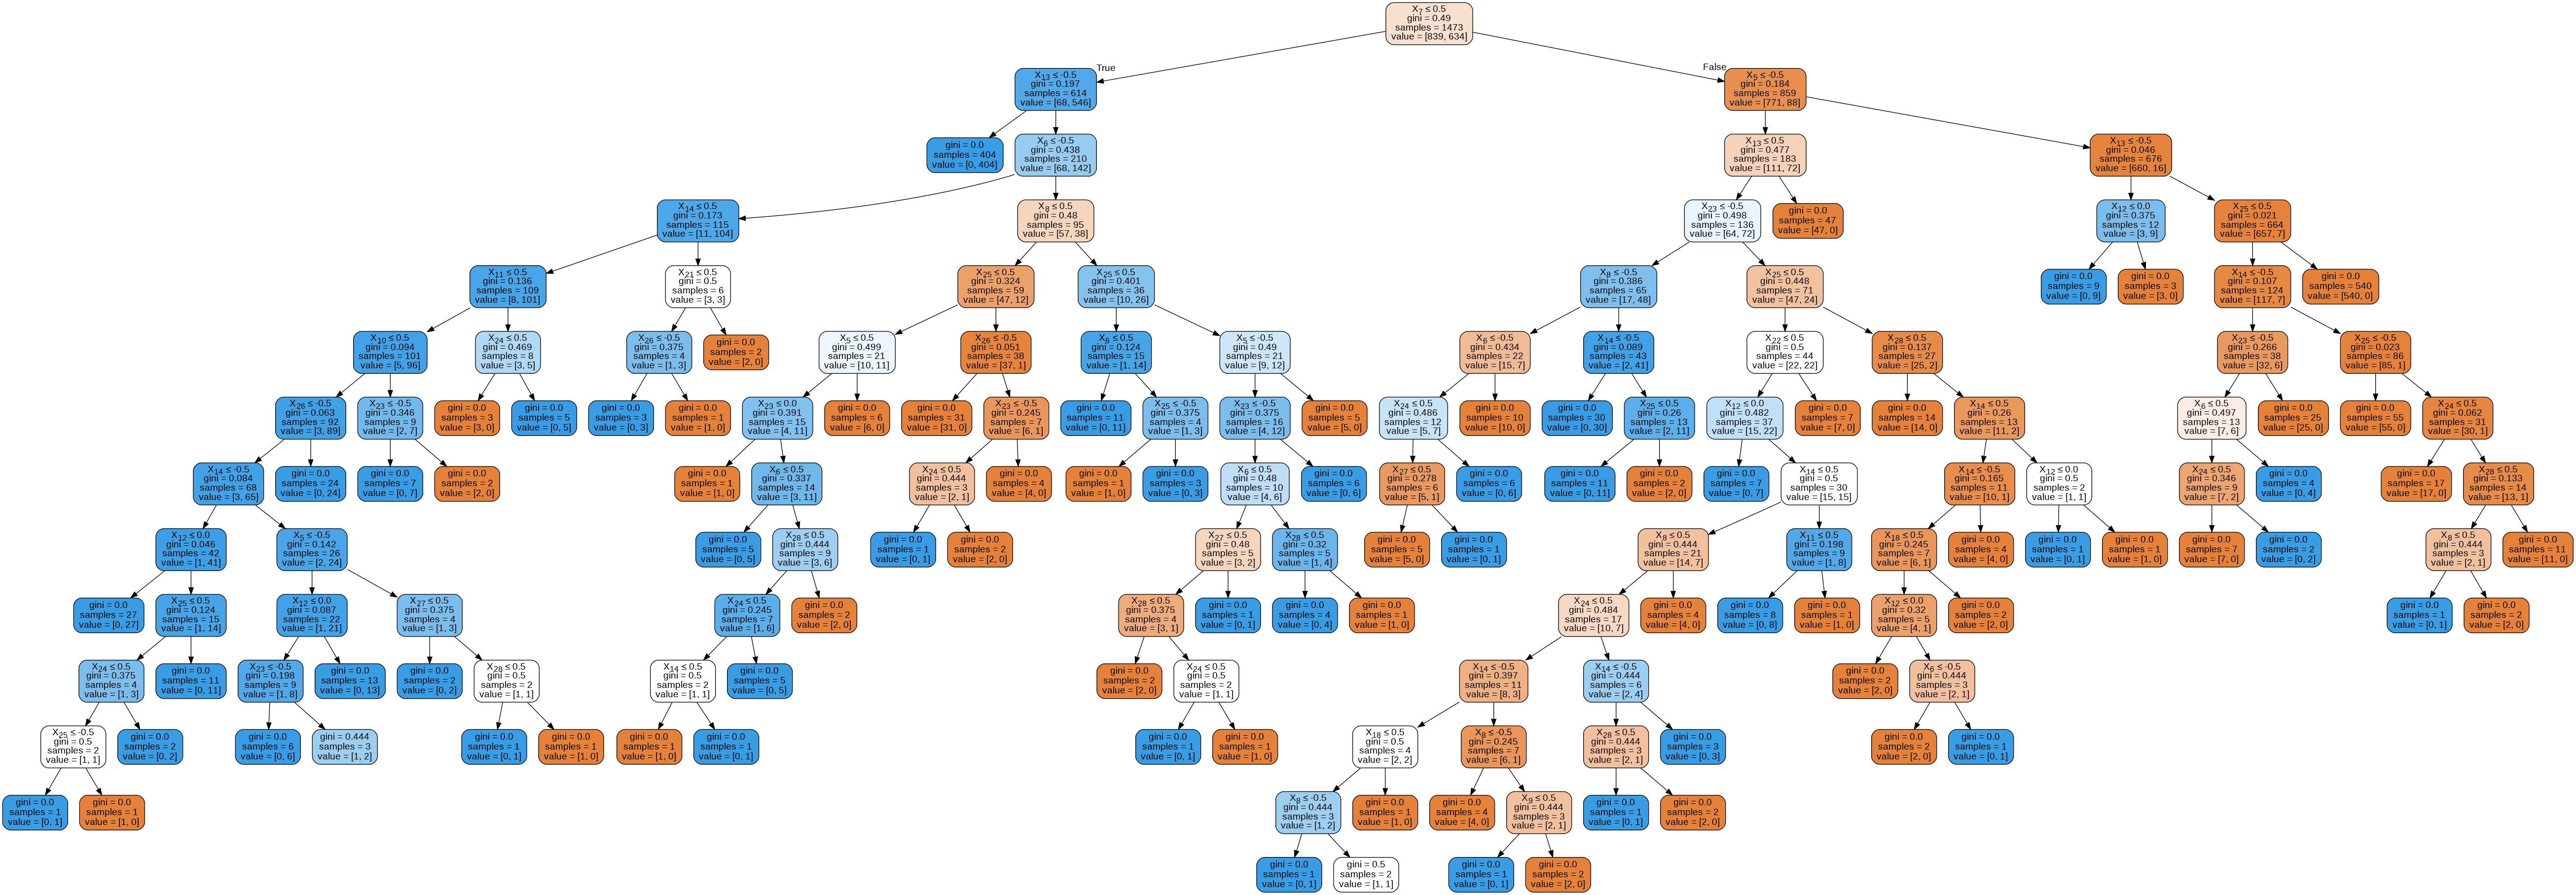

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus



dot_data = StringIO()
export_graphviz( decision_tree_clf , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png() , width = 2400 , height=700)


# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [0]:
random_forest_clf.fit(X_train , y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##  Prediction score on Validation data -- 0.9511

In [0]:
random_forest_clf.score(X_val , y_val)

0.9511201629327902

---
# ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [0]:
extra_trees_clf.fit(X_train , y_train )

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

##  Prediction score on Validation data -- 0.9470

In [0]:
extra_trees_clf.score(X_val , y_val)

0.9470468431771895

### Prediction check

In [0]:
print( "Predicted ---------> " , extra_trees_clf.predict([X_test.iloc[20]])  )

print( "Actual------------->" , y_test.iloc[20] )

Predicted --------->  [1]
Actual-------------> 1


# XGboost

### Version 1 - 9531

In [0]:
!	pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
xg_model = XGBClassifier()


In [0]:
xg_model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
xg_model.score(X_val , y_val)

0.9531568228105907

In [0]:
xg_model.score(X_test , y_test)

0.9369918699186992

In [0]:
test = X_test[X_train.columns]

In [0]:
# print( "Predicted ---------> " ,   , "Actual------------->" , y_val[0] )
prediction_list = xg_model.predict( X_val  )

In [0]:
accuracy_score(y_val , prediction_list )

0.9531568228105907

# Catboost

#### Version1 - 9572

In [0]:
!pip install catboost --no-cache-dir

In [0]:
from catboost import CatBoostClassifier

In [0]:
cb_model = CatBoostClassifier()

In [0]:
cb_model.fit(X_train , y_train)

In [0]:
cb_model.score(X_val , y_val)

0.9572301425661914

In [0]:
cb_model.score(X_test , y_test)

0.943089430894309

# Random Forest with GridSearch

### Random State = 1

In [0]:
random_forest_clf = RandomForestClassifier(random_state=1)

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [17]:
CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
CV_rfc.score(X_val , y_val)

0.9490835030549898

In [19]:
CV_rfc.score(X_test , y_test)

0.9369918699186992

## Version2

In [20]:
param_grid = { 
    'n_estimators': [200, 500 , 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8 , 9 , 10 , 11 , 12],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 700], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
CV_rfc.score(X_val , y_val)

0.955193482688391

In [22]:
CV_rfc.score(X_test , y_test)

0.9390243902439024

## version3

In [23]:
param_grid = { 
    'n_estimators': [200, 500 , 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8 , 9 , 20],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

print(" Val accuracy" , CV_rfc.score(X_val , y_val))

print(" Test accuracy" , CV_rfc.score(X_test , y_test) )

 Val accuracy 0.9572301425661914
 Test accuracy 0.9390243902439024


## version3

In [24]:
param_grid = { 
    'n_estimators': [200, 500 , 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [100],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

print(" Val accuracy" , CV_rfc.score(X_val , y_val))

print(" Test accuracy" , CV_rfc.score(X_test , y_test) )

 Val accuracy 0.9613034623217923
 Test accuracy 0.9613821138211383


## version4

In [25]:
param_grid = { 
    'n_estimators': [200, 500 , 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [400],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

print(" Val accuracy" , CV_rfc.score(X_val , y_val))

print(" Test accuracy" , CV_rfc.score(X_test , y_test) )

 Val accuracy 0.9613034623217923
 Test accuracy 0.9613821138211383


## version5 - 96% Test and Val Accuracy

In [27]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1000],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

print(" Val accuracy" , CV_rfc.score(X_val , y_val))

print(" Test accuracy" , CV_rfc.score(X_test , y_test) )

 Val accuracy 0.9613034623217923
 Test accuracy 0.9613821138211383


## version6

In [29]:
param_grid = { 
    'n_estimators': [200, 500 , 900 , 1200 , 1800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [50 , 250 , 900 , 1500 , 2000 , 10000],
    'criterion' :['gini', 'entropy']
}



CV_rfc = GridSearchCV(estimator= random_forest_clf, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

print(" Val accuracy" , CV_rfc.score(X_val , y_val))

print(" Test accuracy" , CV_rfc.score(X_test , y_test) )

 Val accuracy 0.9613034623217923
 Test accuracy 0.9613821138211383
